# Import de librairies

In [34]:
# data processing
import pandas as pd # Algebre lineraire
from pandas import Series, DataFrame # Statistiques

# data visualization
import seaborn as sb
# matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report


# for missing data
import re

# Lecture du jeu de données (format csv ou txt)

In [35]:
df = pd.read_csv('potentiel_guerison.csv',sep=';',encoding='latin-1')

# Compréhension des données

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Column1                    1236 non-null   int64 
 1   Age                        1236 non-null   int64 
 2   Gender                     1236 non-null   object
 3   Country                    1236 non-null   object
 4   state                      1236 non-null   object
 5   self_employed              1236 non-null   object
 6   family_history             1236 non-null   object
 7   treatment                  1236 non-null   object
 8   work_interfere             1236 non-null   object
 9   no_employees               1236 non-null   object
 10  remote_work                1236 non-null   object
 11  tech_company               1236 non-null   object
 12  benefits                   1236 non-null   object
 13  care_options               1236 non-null   object
 14  wellness

# Préparation des données

## Nettoyage des données

In [37]:
#Suppression des lignes contenant au moins une colonne vide ou nulle
df_ = df
df_
# Condition de test sur l'age
indexNames = df_[ (df_['Age'] <0) | (df_['Age'] >100) ].index
# Suppression des lignes en fonction de la condition fixée sur l'age
df_.drop(indexNames , inplace=True)
dt = df_.iloc[:,1:].fillna(method='ffill')
dt_ = dt.dropna()
dt_

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,potentiel
0,46,male,United States,MD,Yes,Yes,No,Sometimes,01-mai,Yes,...,No,No,Yes,Yes,No,Yes,Yes,Yes,My company does provide healthcare but not to ...,M
1,36,Male,France,MD,Yes,Yes,No,Sometimes,juin-25,Yes,...,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,My company does provide healthcare but not to ...,E
2,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,No,...,Maybe,No,Some of them,Some of them,No,No,No,No,My company does provide healthcare but not to ...,INC
3,31,male,United States,NC,Yes,No,No,Never,01-mai,Yes,...,No,No,Some of them,Some of them,No,Maybe,Yes,No,My company does provide healthcare but not to ...,E
4,46,Male,United States,MA,No,No,Yes,Often,26-100,Yes,...,Maybe,No,Some of them,Yes,No,Maybe,No,No,My company does provide healthcare but not to ...,INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,26,male,United Kingdom,UT,No,No,Yes,Rarely,26-100,No,...,No,No,Some of them,Some of them,No,No,Don't know,No,Bipolar disorder,INC
1232,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,Bipolar disorder,INC
1233,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Yes,Yes,No,No,No,No,No,No,Bipolar disorder,INC
1234,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,...,Yes,No,No,No,No,No,No,No,Bipolar disorder,M


## Etude de corrélation entre les variables

In [38]:
dt_ = dt
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in dt_.columns:
    if dt_.dtypes[col] == object:
        dt_.loc[:,col] = label_encoder.fit_transform(dt_.loc[:,col].astype(str))
        
result = label_encoder.inverse_transform(dt_['potentiel'])

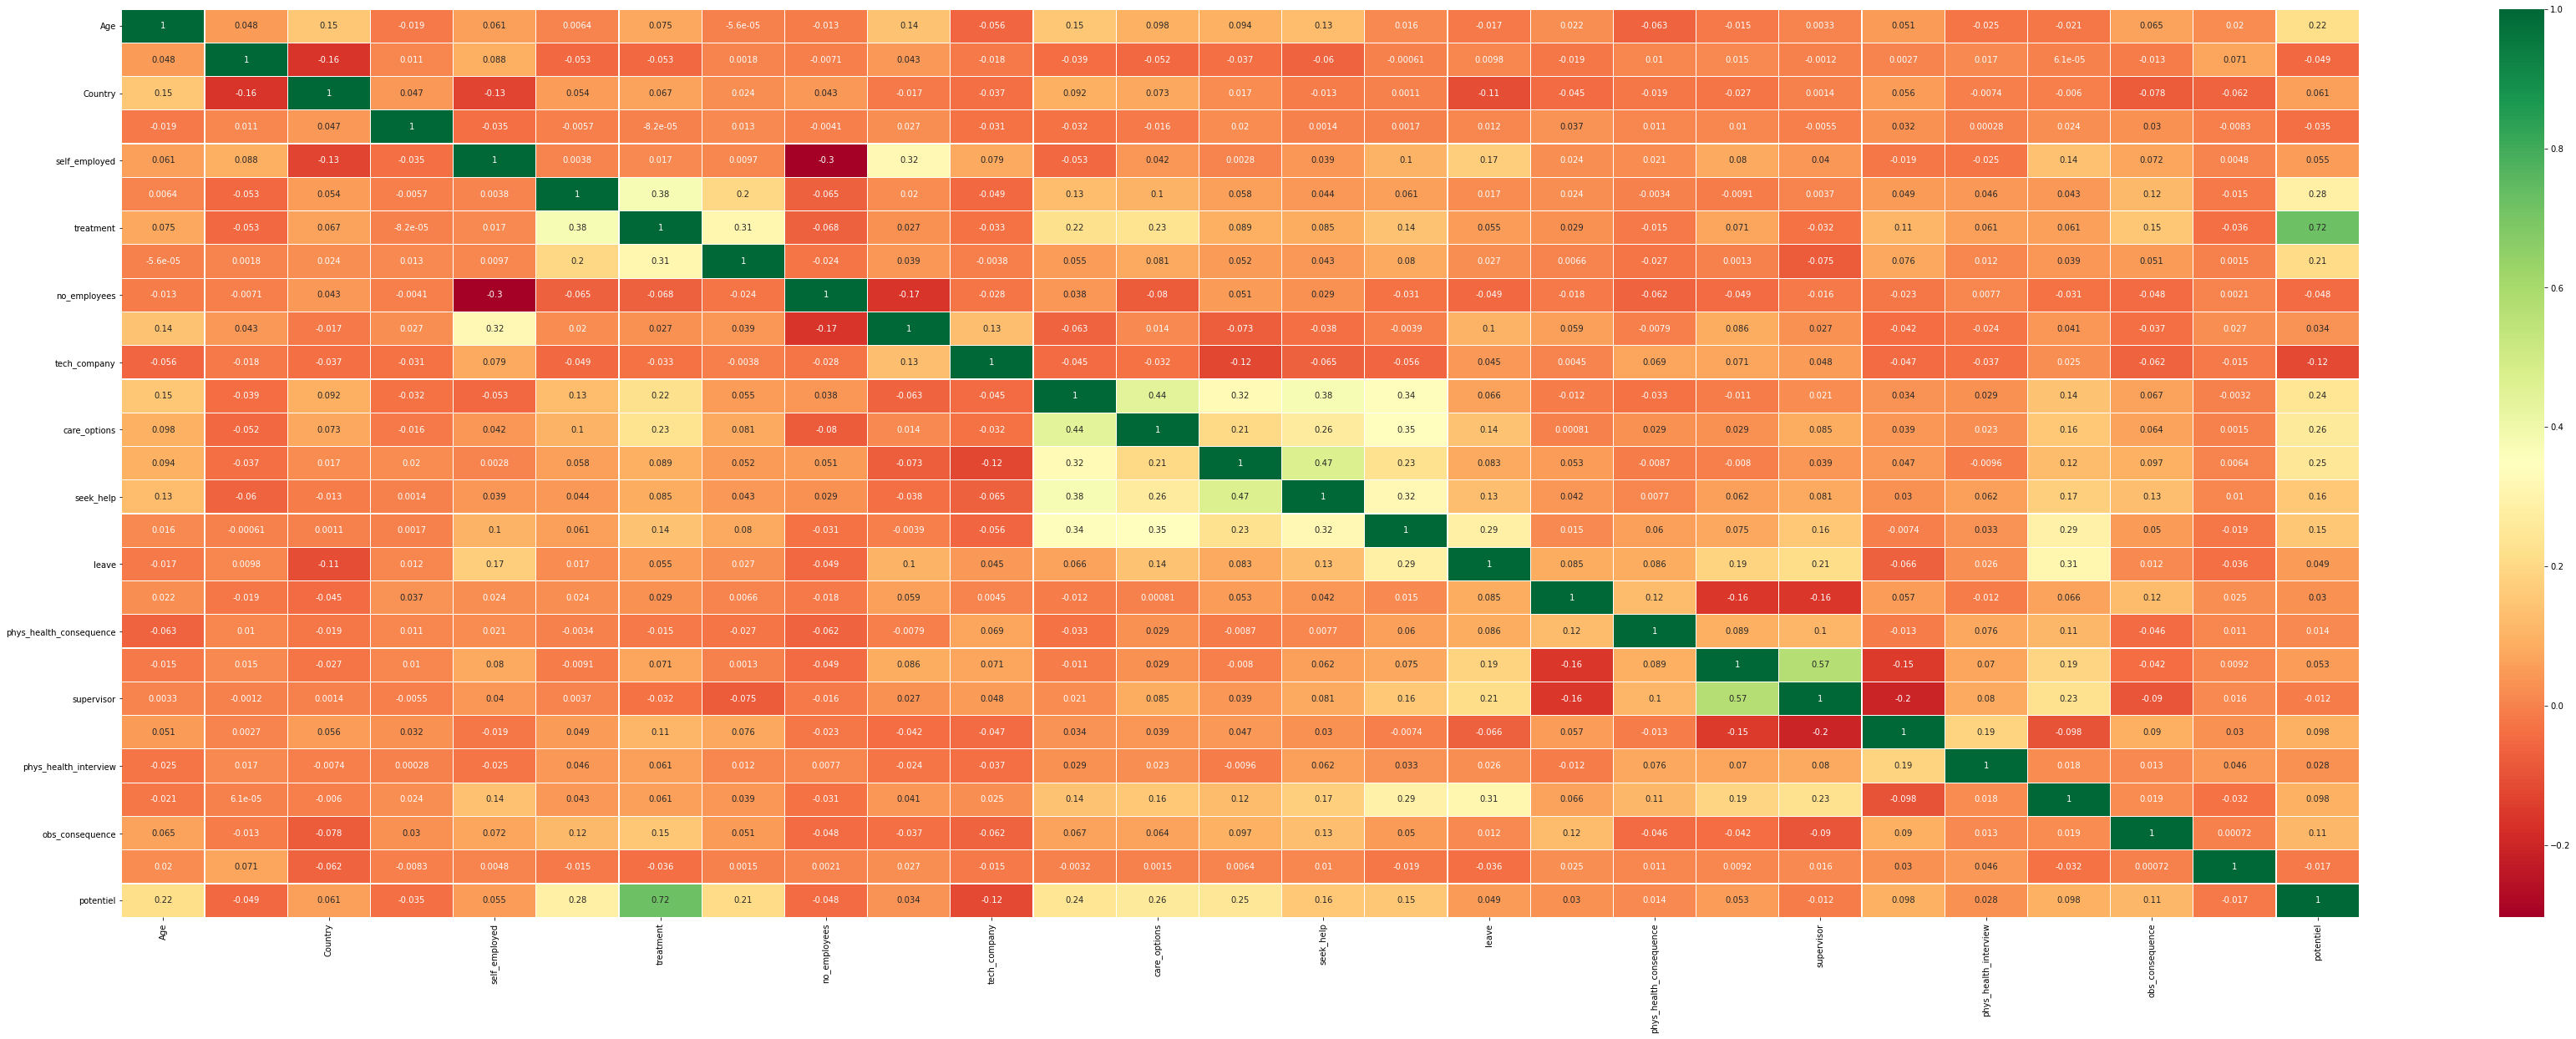

In [39]:
sb.heatmap(dt_.corr(), cmap ='RdYlGn', annot = True, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(60,20)
plt.show()

In [40]:
dt_.iloc[:,:].corr().round(2)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,potentiel
Age,1.00,0.05,0.15,-0.02,0.06,0.01,0.08,-0.00,-0.01,0.14,...,0.02,-0.06,-0.02,0.00,0.05,-0.02,-0.02,0.06,0.02,0.22
Gender,0.05,1.00,-0.16,0.01,0.09,-0.05,-0.05,0.00,-0.01,0.04,...,-0.02,0.01,0.02,-0.00,0.00,0.02,0.00,-0.01,0.07,-0.05
Country,0.15,-0.16,1.00,0.05,-0.13,0.05,0.07,0.02,0.04,-0.02,...,-0.05,-0.02,-0.03,0.00,0.06,-0.01,-0.01,-0.08,-0.06,0.06
state,-0.02,0.01,0.05,1.00,-0.04,-0.01,-0.00,0.01,-0.00,0.03,...,0.04,0.01,0.01,-0.01,0.03,0.00,0.02,0.03,-0.01,-0.04
self_employed,0.06,0.09,-0.13,-0.04,1.00,0.00,0.02,0.01,-0.30,0.32,...,0.02,0.02,0.08,0.04,-0.02,-0.02,0.14,0.07,0.00,0.06
family_history,0.01,-0.05,0.05,-0.01,0.00,1.00,0.38,0.20,-0.07,0.02,...,0.02,-0.00,-0.01,0.00,0.05,0.05,0.04,0.12,-0.01,0.28
treatment,0.08,-0.05,0.07,-0.00,0.02,0.38,1.00,0.31,-0.07,0.03,...,0.03,-0.01,0.07,-0.03,0.11,0.06,0.06,0.15,-0.04,0.72
work_interfere,-0.00,0.00,0.02,0.01,0.01,0.20,0.31,1.00,-0.02,0.04,...,0.01,-0.03,0.00,-0.08,0.08,0.01,0.04,0.05,0.00,0.21
no_employees,-0.01,-0.01,0.04,-0.00,-0.30,-0.07,-0.07,-0.02,1.00,-0.17,...,-0.02,-0.06,-0.05,-0.02,-0.02,0.01,-0.03,-0.05,0.00,-0.05
remote_work,0.14,0.04,-0.02,0.03,0.32,0.02,0.03,0.04,-0.17,1.00,...,0.06,-0.01,0.09,0.03,-0.04,-0.02,0.04,-0.04,0.03,0.03


## Courbes d'évolution du potentiel en fonction de chaque variable (age, genre, ...)

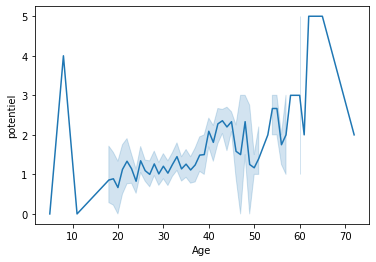

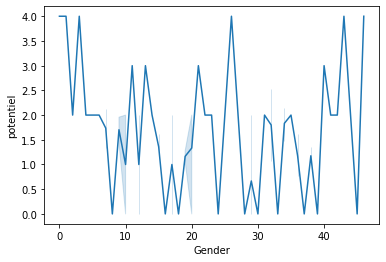

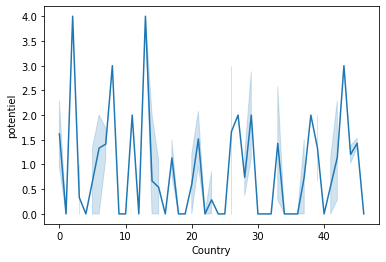

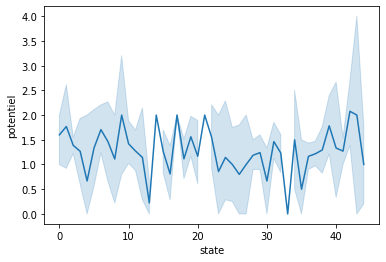

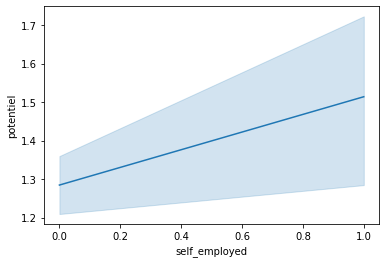

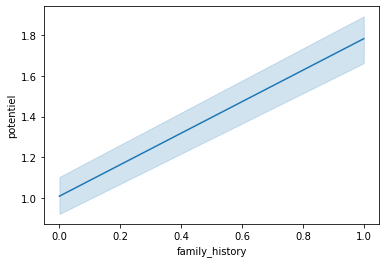

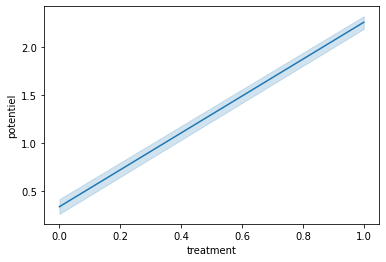

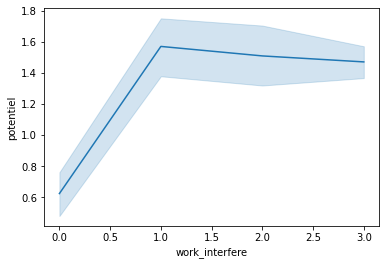

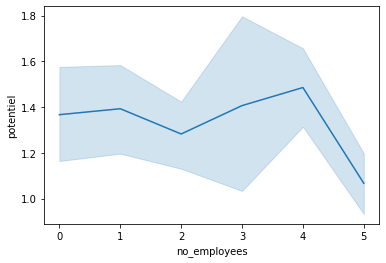

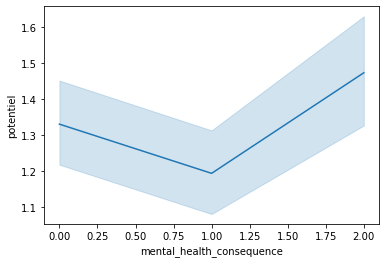

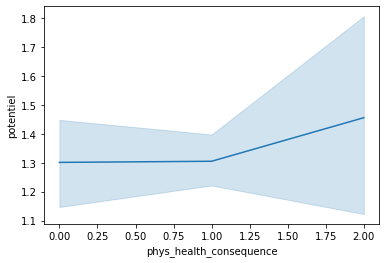

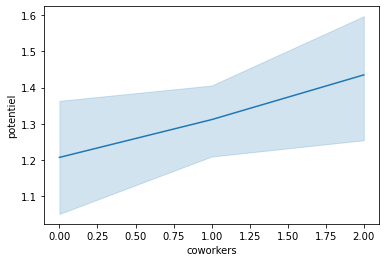

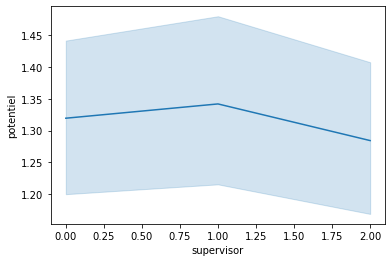

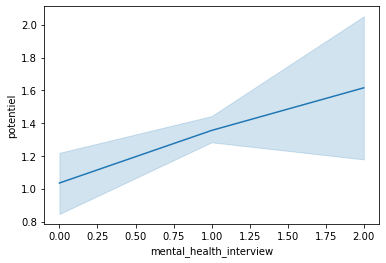

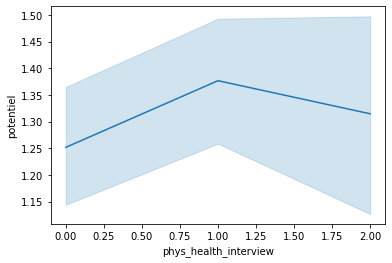

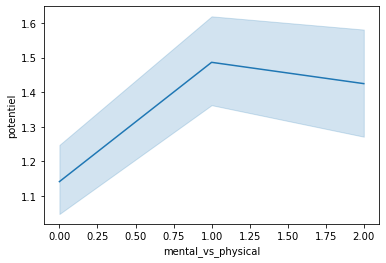

In [41]:
import seaborn as sns
data1_X = ['Age','Gender',
    'Country','state','self_employed','family_history','treatment','work_interfere','no_employees','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical']

for i in dt_[data1_X].columns:
    sns.lineplot(i, 'potentiel', data=dt_)
    plt.show()

## Chargement du fichier à colonne potentiel (depuis Excel)

In [42]:
df_ = dt_
df__ = df_.copy()
df_base = df_.copy()

## Identification et transformation des variables qualitatives en variables quantitatives 

In [43]:
df__

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,potentiel
0,46,38,45,16,1,1,0,3,0,1,...,1,1,2,2,1,2,2,1,91,3
1,36,19,15,16,1,1,0,3,5,1,...,1,1,1,1,0,0,0,0,91,0
2,29,19,45,28,0,1,1,3,1,0,...,0,1,1,1,1,1,1,0,91,2
3,31,38,45,22,1,0,0,0,0,1,...,1,1,1,1,1,0,2,0,91,0
4,46,19,45,15,0,0,1,1,2,1,...,0,1,1,2,1,0,1,0,91,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,26,38,44,38,0,0,1,2,2,0,...,1,1,1,1,1,1,0,0,13,2
1232,32,19,45,10,0,1,1,1,2,1,...,1,1,1,2,1,1,2,0,13,2
1233,34,38,45,2,0,1,1,3,4,0,...,2,2,0,0,1,1,1,0,13,2
1234,46,32,45,22,0,0,0,3,1,1,...,2,1,0,0,1,1,1,0,13,3


In [44]:
df__.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1235
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1236 non-null   int64
 1   Gender                     1236 non-null   int64
 2   Country                    1236 non-null   int64
 3   state                      1236 non-null   int64
 4   self_employed              1236 non-null   int64
 5   family_history             1236 non-null   int64
 6   treatment                  1236 non-null   int64
 7   work_interfere             1236 non-null   int64
 8   no_employees               1236 non-null   int64
 9   remote_work                1236 non-null   int64
 10  tech_company               1236 non-null   int64
 11  benefits                   1236 non-null   int64
 12  care_options               1236 non-null   int64
 13  wellness_program           1236 non-null   int64
 14  seek_help               

# Sélection de variables et séparation des données

In [45]:
data = df__

In [46]:
data_train,data_test  = train_test_split(data, test_size = .3, random_state=25)

In [47]:
X = data.drop(['potentiel'], axis=1)

In [48]:
Y = data['potentiel']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=25)

# Application des algorithmes

## Les arbres de décision

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
print('Accuracy Score:',DT.score(X_test, Y_test))
DT_ = DT.score(X_test, Y_test)

Accuracy Score: 0.9946091644204852


## Les Forêts aléatoires

In [51]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF = RandomForestClassifier(n_estimators=200)
RF.fit(X_train,Y_train)
print('Accuracy Score:',RF.score(X_test, Y_test))
RF_ = RF.score(X_test, Y_test)

Accuracy Score: 0.9649595687331537


## Test et validation du résultat

In [52]:
results = pd.DataFrame({
    'Model': ['Arbre de décision', 'Random Forest'],
    'Score': [DT_, RF_]})
result_df = results.sort_values(by='Score', ascending=False)

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

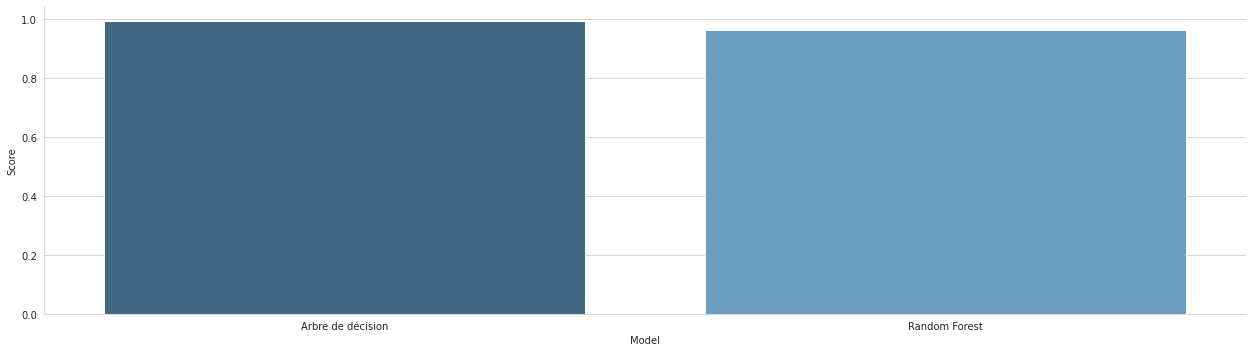

In [54]:
import seaborn as sns
sns.set_style("whitegrid")
from IPython.display import display
bestmodelgraph = result_df.head(9)
ax = sns.catplot("Model", y="Score", data=bestmodelgraph,
                palette='Blues_d',aspect=3.5,kind='bar')

## Choix et mise en place du modèle choisi

In [55]:
from sklearn.tree import DecisionTreeClassifier
Target = ['potentiel']
model = DecisionTreeClassifier()
model.fit(data_train[data1_X], data_train[Target].values.reshape(-1,))
result_predict = model.predict(data_test[data1_X])
result_label = label_encoder.inverse_transform(result_predict)
result = label_encoder.inverse_transform(data_test['potentiel'])
output = pd.DataFrame({'Potentiel Reel':result, 'Potentiel prédit': result_label})
output.to_csv('Model_.csv', index=False)
print("Prediction Réussi")

Prediction Réussi
